In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

In [2]:
rnd.randint(0, 1 + 1, 10)

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [3]:
rnd.randint(0, 1 + 1, 10)

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [4]:
rnd.seed(10)
rnd.randint(0, 1 + 1, 10)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [5]:
rnd.seed(10)
rnd.randint(0, 1 + 1, 10)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [6]:
flip = rnd.randint(0, 1 + 1, 100)
headcount = 0
tailcount = 0
for i in range(100):
    if flip[i] == 0:
        headcount += 1
    else:
        tailcount += 1
print('number of heads: ',headcount)
print('number of tails: ',tailcount)

number of heads:  59
number of tails:  41


In [7]:
headcount = np.count_nonzero(flip == 0)
tailcount = np.count_nonzero(flip == 1)
print('headcount', headcount)
print('tailcount', tailcount)

headcount 59
tailcount 41


In [8]:
outcomes = np.zeros(2, dtype='int') # Two outcomes. heads are stored in outcome[0], tails in outcome[1]
for i in range (2):
    outcomes[i] = np.count_nonzero(flip == i)
    print('outcome ', i, ' is ', outcomes[i])

outcome  0  is  59
outcome  1  is  41


In [9]:
rnd.seed(33)
dicethrow = rnd.randint(1, 6 + 1, 100)
side = np.zeros(6, dtype='int')
for i in range(6):
    side[i] = np.count_nonzero(dicethrow == i + 1)
    print('number of times', i + 1, 'is', side[i])
print('total number of throws ', sum(side))

number of times 1 is 17
number of times 2 is 17
number of times 3 is 15
number of times 4 is 24
number of times 5 is 19
number of times 6 is 8
total number of throws  100


In [10]:
rnd.seed(55)
flips = rnd.randint(low=0, high=1 + 1, size=(2, 100))
tails = np.sum(flips, axis=0)
number_of_tails = np.zeros(3)
for i in range(3):
    number_of_tails[i] = np.count_nonzero(tails == i)
print('number of 0, 1, 2 tails:', number_of_tails)

number of 0, 1, 2 tails: [ 27.  47.  26.]


In [11]:
rnd.seed(55)
flips1 = rnd.randint(low=0, high=1 + 1, size=5)
rnd.seed(55)
flips2 = rnd.choice(range(2), size=5, replace=True)
np.alltrue(flips1 == flips2)  # Check whether all values in the two arrays are equal

True

In [12]:
prob = number_of_tails / 100  # number_of_tails was computed two code cells back
cum_prob = np.cumsum(prob) # So cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], etc.
print('cum_prob ',cum_prob)

cum_prob  [ 0.27  0.74  1.  ]


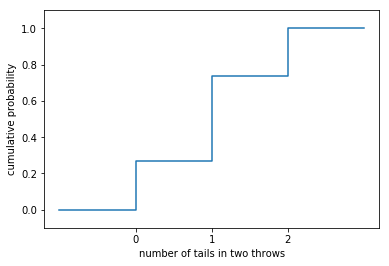

In [13]:
y = np.hstack((0, cum_prob, 1))
plt.plot(range(-1, 4), y, drawstyle='steps-post')
plt.xlabel('number of tails in two throws')
plt.ylabel('cumulative probability')
plt.xticks([0, 1, 2])
plt.ylim(-0.1, 1.1);

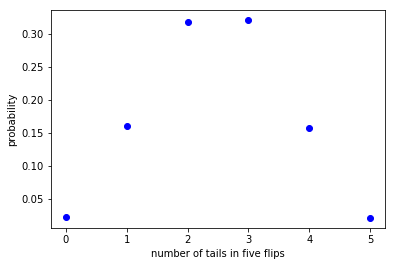

In [14]:
N = 1000
tails = np.sum(rnd.randint(0, 1 + 1, (5, 1000)), axis=0)
counttails = np.zeros(6)
for i in range(6):
    counttails[i] = np.count_nonzero(tails == i)
plt.plot(range(0, 6), counttails / N, 'bo')
plt.xlabel('number of tails in five flips')
plt.ylabel('probability');

cumprob: [ 0.022  0.182  0.501  0.822  0.979  1.   ]


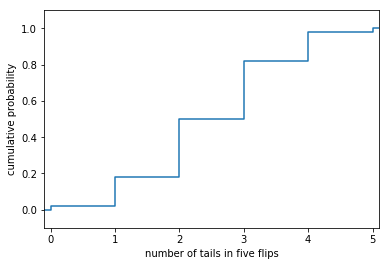

In [15]:
cumprob = np.cumsum(counttails / N)
print('cumprob:', cumprob)
y = np.hstack((0, cumprob, 1))
plt.plot(np.arange(-1, 7), y, drawstyle='steps-post')
plt.xlim(-0.1, 5.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('number of tails in five flips')
plt.ylabel('cumulative probability');

In [16]:
from scipy.misc import comb
print('Theoretical probabilities:')
for k in range(6):
    print(k, ' tails ', comb(5, k) * 0.5 ** k * 0.5 ** (5 - k))
for N in (1000, 10000, 100000):
    tails = np.sum(rnd.randint(0, 1 + 1, (5, N)), axis=0)
    counttails = np.zeros(6)
    for i in range(6):
        counttails[i] = np.count_nonzero(tails==i)
    print('Probability with', N, 'trials: ', counttails / float(N))

Theoretical probabilities:
0  tails  0.03125
1  tails  0.15625
2  tails  0.3125
3  tails  0.3125
4  tails  0.15625
5  tails  0.03125
Probability with 1000 trials:  [ 0.028  0.152  0.336  0.291  0.164  0.029]
Probability with 10000 trials:  [ 0.0308  0.1584  0.3114  0.3106  0.1607  0.0281]
Probability with 100000 trials:  [ 0.03136  0.15718  0.31118  0.31196  0.15627  0.03205]


[ 0.04   0.11   0.241  0.463  0.697  1.   ]


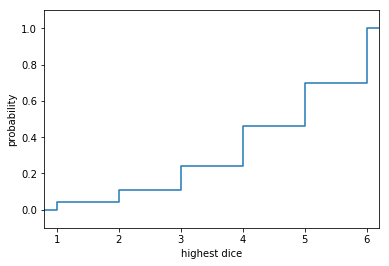

In [17]:
dice = rnd.randint(1, 6 + 1, (2, 1000))
highest_dice = np.amax(dice, 0)
outcome = np.zeros(6)
for i in range(6):
    outcome[i] = np.sum(highest_dice == i + 1) / 1000
y = np.hstack((0, np.cumsum(outcome), 1))
plt.plot(range(0, 8), y, drawstyle='steps-post')
plt.xlim(0.8, 6.2)
plt.ylim(-0.1, 1.1)
print(np.cumsum(outcome))
plt.xlabel('highest dice')
plt.ylabel('probability');

In [18]:
for N in [100, 1000, 10000]:
    dice = rnd.randint(1, 6 + 1, (2, N))
    highest_dice = np.max(dice, axis=0)
    outcome = np.zeros(6)
    for i in range(6):
        outcome[i] = np.sum(highest_dice == i + 1) / N
    print('Outcome for', N, 'throws: ', outcome)
# Exact values
exact = np.zeros(6)
for i, j in enumerate(range(1, 12, 2)):
    exact[i] = j / 36
print('Exact probabilities: ',exact)

Outcome for 100 throws:  [ 0.02  0.11  0.08  0.16  0.28  0.35]
Outcome for 1000 throws:  [ 0.022  0.077  0.147  0.201  0.247  0.306]
Outcome for 10000 throws:  [ 0.0279  0.084   0.1409  0.1832  0.2511  0.3129]
Exact probabilities:  [ 0.02777778  0.08333333  0.13888889  0.19444444  0.25        0.30555556]


In [19]:
balls = np.zeros(10, dtype='int') # zero is blue
balls[4:] = 1  # one is red
print('balls:', balls)
drawing = rnd.choice(balls, 10, replace=True)
print('drawing:', drawing)
print('blue balls:', np.count_nonzero(drawing == 0))
print('red balls:', np.count_nonzero(drawing == 1))

balls: [0 0 0 0 1 1 1 1 1 1]
drawing: [0 1 1 0 0 0 1 0 1 0]
blue balls: 6
red balls: 4


In [20]:
rnd.seed(2)
people = np.zeros(1000000, dtype='int')  # candidate A is 0
people[490000:] = 1  # candidate B is 1
pole = rnd.choice(people, 1000)
poled_for_A = np.count_nonzero(pole == 0)
print('poled for A:', poled_for_A)
if poled_for_A > 500: 
    print('The Dog will predict the wrong winner')
else:
    print('The Dog will predict the correct winner')

poled for A: 508
The Dog will predict the wrong winner


In [21]:
Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # candidate A is 0
    people[490000:] = 1  # candidate B is 1
    pole = rnd.choice(people, 1000)
    poled_for_A = np.count_nonzero(pole == 0)
    if poled_for_A > 500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 poles of 1000 people')
print('Probability that The Dog predicts candidate A to win:', Awins / 1000)

1000 poles of 1000 people
Probability that The Dog predicts candidate A to win: 0.267


In [22]:
Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # candidate A is 0
    people[490000:] = 1  # candidate B is 1
    pole = rnd.choice(people, 5000)
    poled_for_A = np.count_nonzero(pole == 0)
    if poled_for_A > 2500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 poles of 5000 people')
print('Probability that The Dog predicts candidate A to win:', Awins / 5000)

1000 poles of 5000 people
Probability that The Dog predicts candidate A to win: 0.014
